In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
training_data_file = "train_data.txt"
validation_data_file = "test_data_solution.txt"
test_data_file = "test_data.txt"

In [4]:
train = pd.read_csv(training_data_file, delimiter=" ::: ", names=["S.no", "Movie", "Genre", "Description"])
test = pd.read_csv(test_data_file, delimiter=" ::: ", names=["S.no", "Movie", "Description"])
validation = pd.read_csv(validation_data_file, delimiter=" ::: ", names=["S.no", "Movie", "Genre", "Description"])
combined = pd.concat([train, validation])


C:\Users\prath\AppData\Local\Temp\ipykernel_20476\1933649389.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(training_data_file, delimiter=" ::: ", names=["S.no", "Movie", "Genre", "Description"])
C:\Users\prath\AppData\Local\Temp\ipykernel_20476\1933649389.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(test_data_file, delimiter=" ::: ", names=["S.no", "Movie", "Description"])
C:\Users\prath\AppData\Local\Temp\ipykernel_20476\1933649389.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separa

In [5]:
train.head()

,S.no,Movie,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
train.shape

(54214, 4)

In [7]:
combined.head()

,S.no,Movie,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [8]:
combined.shape

(108414, 4)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
x = tfidf_vectorizer.fit_transform(combined['Description'])
x

<108414x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3660222 stored elements in Compressed Sparse Row format>

In [11]:
y = combined['Genre']
y

0           drama
1        thriller
2           adult
3           drama
4           drama
           ...   
54195      horror
54196     western
54197       adult
54198       drama
54199       drama
Name: Genre, Length: 108414, dtype: object

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train

<86731x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2924485 stored elements in Compressed Sparse Row format>

In [14]:
y_train.head()

22489    documentary
45345          drama
47747    documentary
6679           drama
26395        western
Name: Genre, dtype: object

In [15]:
y_test.head()

2541           drama
34097    documentary
50681    documentary
48932          short
39301    documentary
Name: Genre, dtype: object

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred)*100)
print(classification_report(y_test, lr_y_pred))

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 59.456717243923805
              precision    recall  f1-score   support

      action       0.49      0.33      0.40       526
       adult       0.58      0.29      0.39       228
   adventure       0.57      0.22      0.32       304
   animation       0.54      0.12      0.20       211
   biography       0.00      0.00      0.00       103
      comedy       0.54      0.60      0.57      2988
       crime       0.31      0.06      0.10       223
 documentary       0.69      0.83      0.75      5185
       drama       0.56      0.77      0.65      5550
      family       0.43      0.12      0.19       288
     fantasy       0.50      0.07      0.12       147
   game-show       0.70      0.45      0.55        73
     history       0.00      0.00      0.00       116
      horror       0.68      0.63      0.65       883
       music       0.63      0.46      0.53       300
     musical       0.50      0.06      0.11       114
     mystery       0.29      0.0

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred)*100)
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 50.57418253931652


c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.48      0.03      0.05       526
       adult       0.68      0.08      0.15       228
   adventure       0.59      0.14      0.23       304
   animation       0.00      0.00      0.00       211
   biography       0.00      0.00      0.00       103
      comedy       0.52      0.33      0.40      2988
       crime       1.00      0.01      0.02       223
 documentary       0.58      0.84      0.68      5185
       drama       0.43      0.82      0.57      5550
      family       0.69      0.03      0.06       288
     fantasy       0.00      0.00      0.00       147
   game-show       0.76      0.52      0.62        73
     history       0.00      0.00      0.00       116
      horror       0.61      0.25      0.36       883
       music       0.70      0.29      0.41       300
     musical       1.00      0.02      0.03       114
     mystery       1.00      0.01      0.02       114
        news       0.00    

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred)*100)
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Accuracy: 50.68486833002813
              precision    recall  f1-score   support

      action       0.39      0.16      0.22       526
       adult       0.44      0.25      0.32       228
   adventure       0.39      0.16      0.23       304
   animation       0.24      0.09      0.14       211
   biography       0.00      0.00      0.00       103
      comedy       0.58      0.34      0.43      2988
       crime       0.19      0.08      0.11       223
 documentary       0.61      0.75      0.67      5185
       drama       0.45      0.78      0.57      5550
      family       0.19      0.08      0.11       288
     fantasy       0.18      0.07      0.10       147
   game-show       0.53      0.42      0.47        73
     history       0.07      0.03      0.04       116
      horror       0.64      0.41      0.50       883
       music       0.52      0.36      0.43       300
     musical       0.17      0.09      0.11       114
     mystery       0.09      0.05  

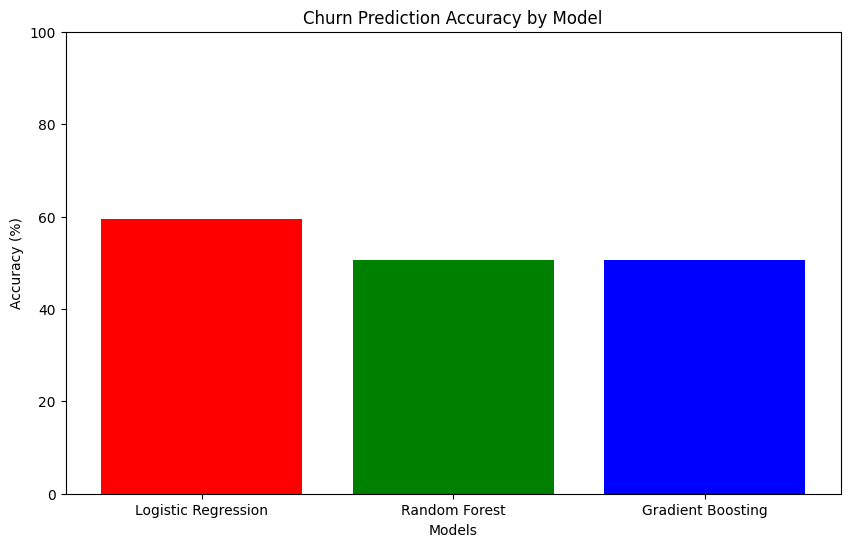

In [35]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, lr_y_pred) * 100, accuracy_score(y_test, rf_y_pred) * 100, accuracy_score(y_test, gb_y_pred) * 100]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['Red', 'Green', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Churn Prediction Accuracy by Model')
plt.ylim(0, 100)
plt.show()